In [2]:
import keras
from keras.optimizers import SGD
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy  as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

/Users/Tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


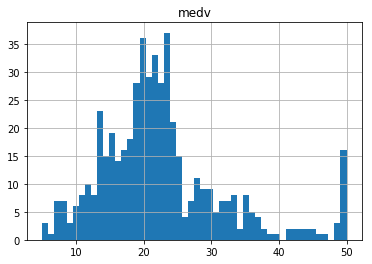

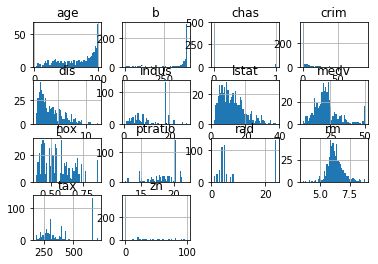

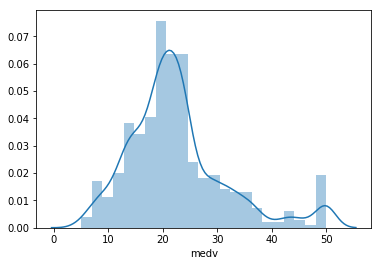

In [3]:
house = pd.read_csv('BostonHousing.csv')
print(house.head(20))
#import pandas.to_numeric

house = house.astype(np.float64)
#house = house.to_numeric()
print(house.head(20))
y=np.array(house['medv'])
df1 = house.drop(labels='medv', axis = 1)
print(df1.head())
X = df1.as_matrix()
dim = X.shape[1]
print(dim)
print(house.head(10))


house.hist(column='medv', bins=50)
plt.show()

house.hist(bins=50)
plt.show()
import seaborn as sns
sns.distplot(house['medv']);
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_test.shape, y_test.shape, len(X_test), len(y_test))

(152, 13) (152,) 152 152


In [31]:
np.random.seed(102)

# define the keras model
model= Sequential()
model.add(Dense(26, activation='relu',input_shape=(13,)))
model.add(Dense(26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model = build_model()
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
early_stopping= keras.callbacks.EarlyStopping(monitor='loss',patience=4)
history=model.fit(X_train, y_train, batch_size = 1,shuffle=True, epochs = 75, validation_data=(X_test, y_test),verbose=2)#,callbacks=[early_stopping]

Train on 354 samples, validate on 152 samples
Epoch 1/75
 - 1s - loss: 85.2581 - mean_absolute_error: 6.7208 - val_loss: 68.2311 - val_mean_absolute_error: 5.8968
Epoch 2/75
 - 0s - loss: 69.8628 - mean_absolute_error: 6.0205 - val_loss: 70.4615 - val_mean_absolute_error: 6.0791
Epoch 3/75
 - 0s - loss: 65.9810 - mean_absolute_error: 5.7353 - val_loss: 74.1193 - val_mean_absolute_error: 6.8849
Epoch 4/75
 - 0s - loss: 60.7282 - mean_absolute_error: 5.4819 - val_loss: 61.4803 - val_mean_absolute_error: 5.6692
Epoch 5/75
 - 0s - loss: 58.6211 - mean_absolute_error: 5.4357 - val_loss: 76.3155 - val_mean_absolute_error: 7.2420
Epoch 6/75
 - 0s - loss: 56.1810 - mean_absolute_error: 5.3253 - val_loss: 67.6197 - val_mean_absolute_error: 6.0740
Epoch 7/75
 - 0s - loss: 51.1764 - mean_absolute_error: 5.1274 - val_loss: 67.7589 - val_mean_absolute_error: 5.3549
Epoch 8/75
 - 0s - loss: 50.0710 - mean_absolute_error: 5.1262 - val_loss: 53.2118 - val_mean_absolute_error: 4.6730
Epoch 9/75
 - 0s -

Epoch 71/75
 - 0s - loss: 17.1841 - mean_absolute_error: 3.1311 - val_loss: 28.7473 - val_mean_absolute_error: 3.6704
Epoch 72/75
 - 1s - loss: 18.4666 - mean_absolute_error: 3.1093 - val_loss: 27.3462 - val_mean_absolute_error: 3.6358
Epoch 73/75
 - 0s - loss: 16.5999 - mean_absolute_error: 2.9894 - val_loss: 29.7164 - val_mean_absolute_error: 3.4872
Epoch 74/75
 - 0s - loss: 17.3688 - mean_absolute_error: 3.0788 - val_loss: 36.9592 - val_mean_absolute_error: 4.0119
Epoch 75/75
 - 1s - loss: 17.2695 - mean_absolute_error: 3.0795 - val_loss: 24.3820 - val_mean_absolute_error: 3.3751


In [32]:
print(model.metrics_names)
val_mse, val_mae =model.evaluate(X_test, y_test, verbose = 1)


score = model.evaluate(X_test, y_test, verbose=0)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

['loss', 'mean_absolute_error']
152/152 [==============================] - 0s 57us/step

Test score: 24.382022355732165
Test accuracy: 3.3750664434934916


In [33]:
print(val_mse, val_mae)
test_pred = model.predict(X_test).flatten()
print(model.metrics_names)

24.382022355732165 3.3750664434934916
['loss', 'mean_absolute_error']


(5.760305648796239, 49.6248280944899)

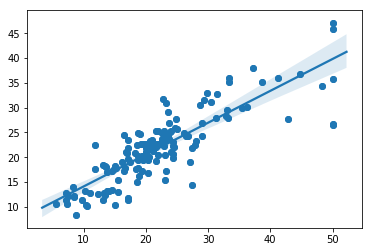

In [34]:
sns.regplot(y_test,test_pred)


plt.scatter(y_test, test_pred)
plt.show
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())



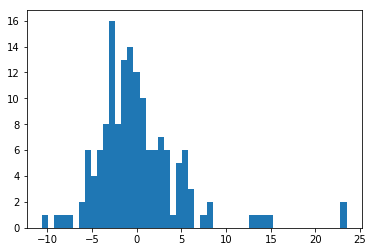

In [35]:
error = test_pred - y_test
plt.hist(-error,bins = 50)
plt.show()

/Users/Tom/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Tom/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


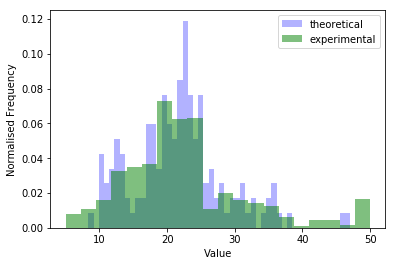

22.532806324110698 21.833166
 keras mse = 4.937815662976571


In [36]:
datalist2 = np.array(house['medv'])
plt.hist(test_pred,bins=50,color='b',alpha=0.3,label='theoretical',histtype='stepfilled', normed=True)
plt.hist(datalist2,bins=20,alpha=0.5,color='g',label='experimental',histtype='stepfilled',normed=True)
plt.xlabel("Value")
plt.ylabel("Normalised Frequency")
plt.legend()
plt.show()
print(house['medv'].mean(), test_pred.mean())

err =test_pred - y_test
mse = np.mean(err*err)
print(' keras mse =',np.sqrt(mse))

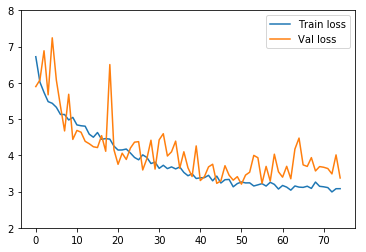

In [37]:
def plot_history(history):
    plt.figure
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Train loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label='Val loss')
    plt.legend()
    plt.ylim([2,8])
    plt.show()
    
plot_history(history)

In [38]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(
    hidden_layer_sizes=(50,50,50),
    alpha = 0,
    activation='relu',
    batch_size=128,
    learning_rate_init = 1e-3,
    solver = 'adam',
    learning_rate = 'constant',
    verbose = False,
    n_iter_no_change = 1000,
    validation_fraction = 0.0,
    max_iter=1000)
model.fit(X_train, y_train)

py = model.predict(X_test)
err = y_test - py
mse = np.mean(err**2)
rmse = np.sqrt(mse)
print('sklearn rmse for test %g' % rmse)
err =test_pred - y_test
mse = np.mean(err*err)
print(' keras test mse =',np.sqrt(mse))
test_pred = model.predict(X_train).flatten()
err = test_pred - y_train
mse = np.mean(err*err)
print(' keras train mse =',np.sqrt(mse))

sklearn rmse for test 4.41707
 keras test mse = 4.937815662976571
 keras train mse = 2.7607545756147425


/Users/Tom/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
